## Post harvest loss data

original data source:
https://www.aphlis.net/

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

In [6]:
aphlis_files = Path.cwd().parent.parent.joinpath('data', 'external', 'APHLIS').glob('*')
df = pd.DataFrame()

for f in aphlis_files:
    df_temp = pd.read_csv(f, sep=';')
    df_temp['year'] = int(str(f).split('-')[-1].split('.')[0])
    df = df.append(df_temp)



In [7]:
df.columns

Index(['Unnamed: 0', 'Maize', 'Rice', 'Sorghum', 'Millet', 'Wheat', 'Barley',
       'Fonio', 'Oats', 'Teff', 'year'],
      dtype='object')

In [8]:
df.columns =['region',  'Maize', 'Rice', 'Sorghum', 'Millet', 'Wheat', 'Barley',
       'Fonio', 'Oats', 'Teff', 'year']
df = df.melt(id_vars=['region', 'year'], value_vars=['Maize', 'Rice', 'Sorghum', 'Millet', 'Wheat', 'Barley',
       'Fonio', 'Oats', 'Teff'], var_name='crop')

In [9]:
df.head()

,region,year,crop,value
0,Dakar,2014,Maize,17.19
1,Diourbel,2014,Maize,20.67
2,Fatick,2014,Maize,20.75
3,Kaffrine,2014,Maize,20.60
4,Kaolack,2014,Maize,20.60


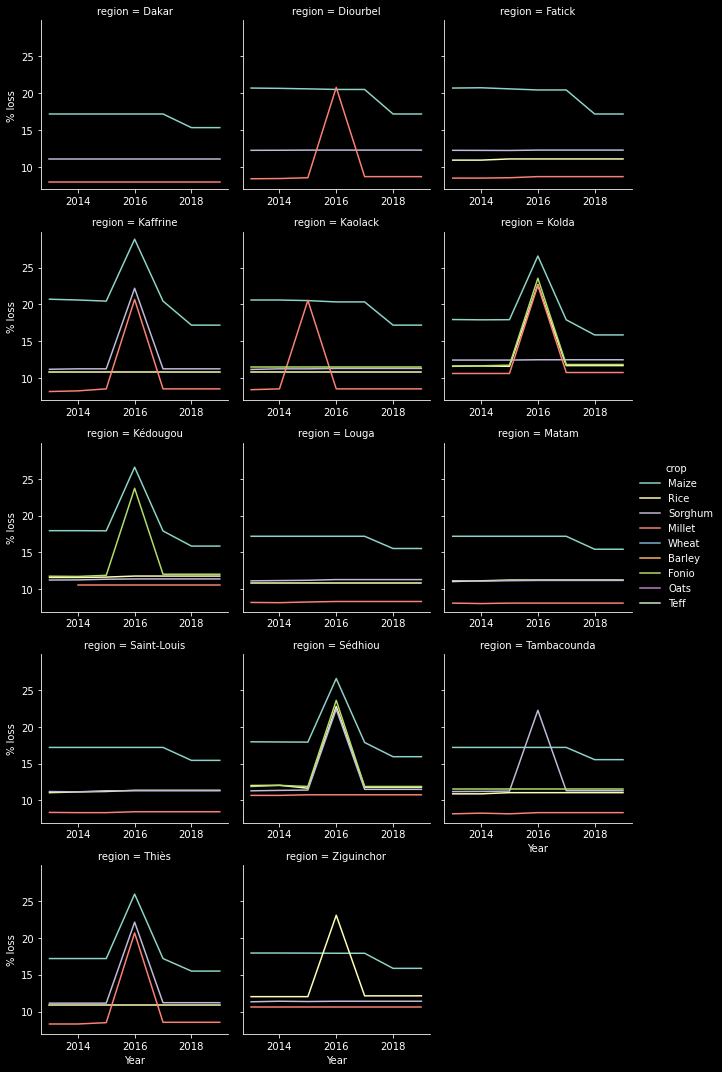

In [10]:
g = sns.FacetGrid(data = df, col='region', col_wrap=3, hue='crop',
                  sharex=False)
g.map(sns.lineplot, 'year','value' )
g.set_axis_labels("Year", "% loss")
g.add_legend()

In [12]:
df['year'].unique()


array([2014, 2019, 2013, 2015, 2018, 2016, 2017])

In [14]:
df.to_csv(Path.cwd().parent.parent.joinpath('data',
                                            'external',
                                            'APHLIS',
                                            'SEN_aphlis_2013-2019.csv'))